In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

target =[]
images = []
flat_data = []
DATADIR = r'C:\Users\semih\Desktop\brain_tumor'
CATEGORIES = ['yes', 'no']
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [2]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train,y_test = train_test_split(flat_data,target,test_size=0.2,random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=100, random_state=42)
random.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

In [4]:
y_pred = random.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [5]:
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(y_pred , y_test)

0.9644012944983819

In [6]:
confusion_matrix(y_pred,y_test)

array([[303,  10],
       [ 12, 293]], dtype=int64)

Enter URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1j09qd7R5vmIgxOnezsyeeSJxVOvxYzWmAg&usqp=CAU
(183, 275, 3)
Predict : yes


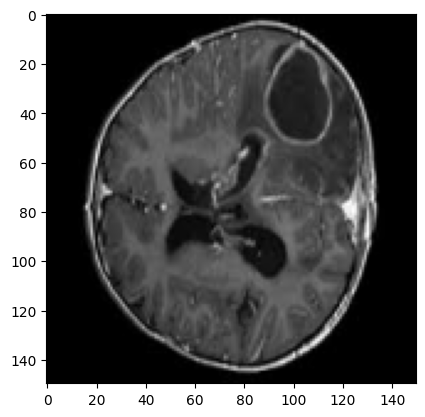

In [11]:
import pickle
pickle.dump(random,open('img_model.p','wb'))
model=pickle.load(open('img_model.p','rb'))
flat_data = []
url = input('Enter URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data= np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predict : {y_out}')